In [1]:
# using Pkg
# Pkg.activate("D:\\Science\\Code\\Julia\\envr")

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [3]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end;

In [4]:
t = 500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [5]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.3;  const ΔU0 = 0.305;

In [6]:
I0 = -1.56203902;

In [7]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[20.455045022701544, 0.6593363650670052, 0.4460452247536085]

3-element SVector{3, Float64} with indices SOneTo(3):
 20.455045022701544
  0.6593363650670052
  0.4460452247536085

In [8]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [20.455, 0.659336, 0.446045]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, …, 0.3, 0.305, 0.3, -1.56204]

In [9]:
lb_size = 35; tck_size = 30;

In [10]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
trange = range(0.0, t, step = tstep);

In [11]:
ts, tf = 1, 15000

(1, 15000)

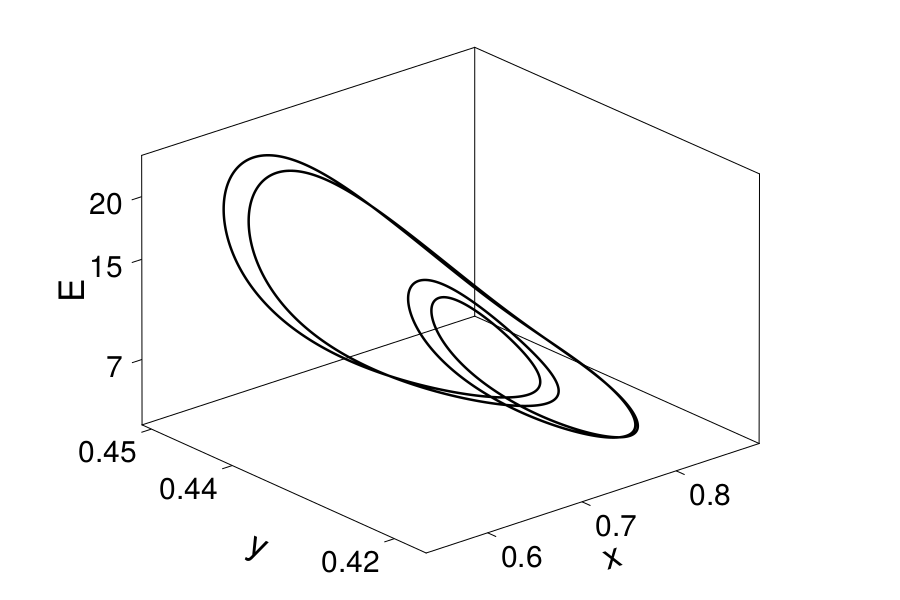

In [12]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.42, 0.44, 0.45], zticks = [7, 15, 20])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [13]:
# save("phase_4-period_cycle.eps", f)

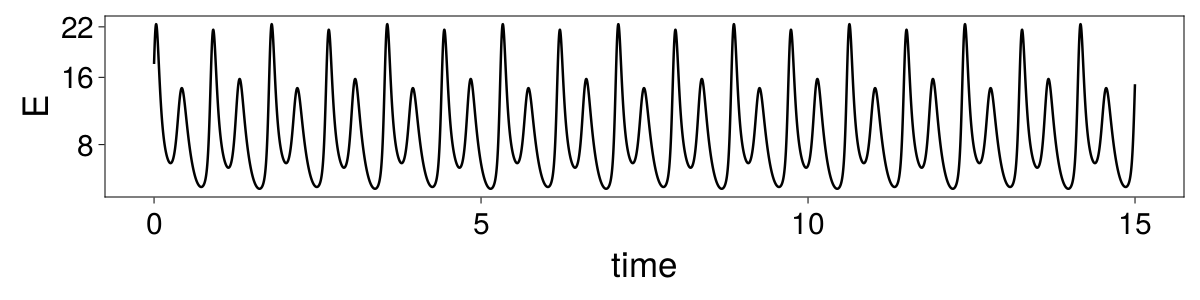

In [14]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false,
            yticks = [8, 16, 22])
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [15]:
# save("timeseries_4-period_cycle.eps", f)